In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_log_error

In [3]:
df = pd.read_csv(r'C:\Users\DELL 7510\Downloads\AMIT-AI.Tasks\car_price.csv',encoding='ISO-8859-1')

In [4]:
df.shape

(500, 9)

In [5]:
df.head()

,customer name,customer e-mail,country,gender,age,annual Salary,credit card debt,net worth,car purchase amount
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,1,57.313749,59729.15130,5358.712177,560304.0671,55915.46248


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   customer name        500 non-null    object 
 1   customer e-mail      500 non-null    object 
 2   country              500 non-null    object 
 3   gender               500 non-null    int64  
 4   age                  500 non-null    float64
 5   annual Salary        500 non-null    float64
 6   credit card debt     500 non-null    float64
 7   net worth            500 non-null    float64
 8   car purchase amount  500 non-null    float64
dtypes: float64(5), int64(1), object(3)
memory usage: 35.3+ KB


In [7]:
df.describe()

,gender,age,annual Salary,credit card debt,net worth,car purchase amount
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,0.506000,46.241674,62127.239608,9607.645049,431475.713625,44209.799218
std,0.500465,7.978862,11703.378228,3489.187973,173536.756340,10773.178744
min,0.000000,20.000000,20000.000000,100.000000,20000.000000,9000.000000
25%,0.000000,40.949969,54391.977195,7397.515792,299824.195900,37629.896040
50%,1.000000,46.049901,62915.497035,9655.035568,426750.120650,43997.783390
75%,1.000000,51.612263,70117.862005,11798.867487,557324.478725,51254.709517
max,1.000000,70.000000,100000.000000,20000.000000,1000000.000000,80000.000000


In [8]:
df.duplicated().sum()

np.int64(0)

In [9]:
df.isna().sum()

customer name          0
customer e-mail        0
country                0
gender                 0
age                    0
annual Salary          0
credit card debt       0
net worth              0
car purchase amount    0
dtype: int64

In [10]:
df.columns

Index(['customer name', 'customer e-mail', 'country', 'gender', 'age',
       'annual Salary', 'credit card debt', 'net worth',
       'car purchase amount'],
      dtype='object')

In [11]:
df.country.value_counts()

country
Mauritania                                      6
Israel                                          6
Bolivia                                         6
Kyrgyzstan                                      5
Samoa                                           5
                                               ..
Ukraine                                         1
New Zealand                                     1
Saint Helena, Ascension and Tristan da Cunha    1
Malaysia                                        1
marlal                                          1
Name: count, Length: 211, dtype: int64

In [12]:
df.country

0          Bulgaria
1            Belize
2           Algeria
3      Cook Islands
4            Brazil
           ...     
495           Nepal
496        Zimbabwe
497     Philippines
498        Botswana
499          marlal
Name: country, Length: 500, dtype: object

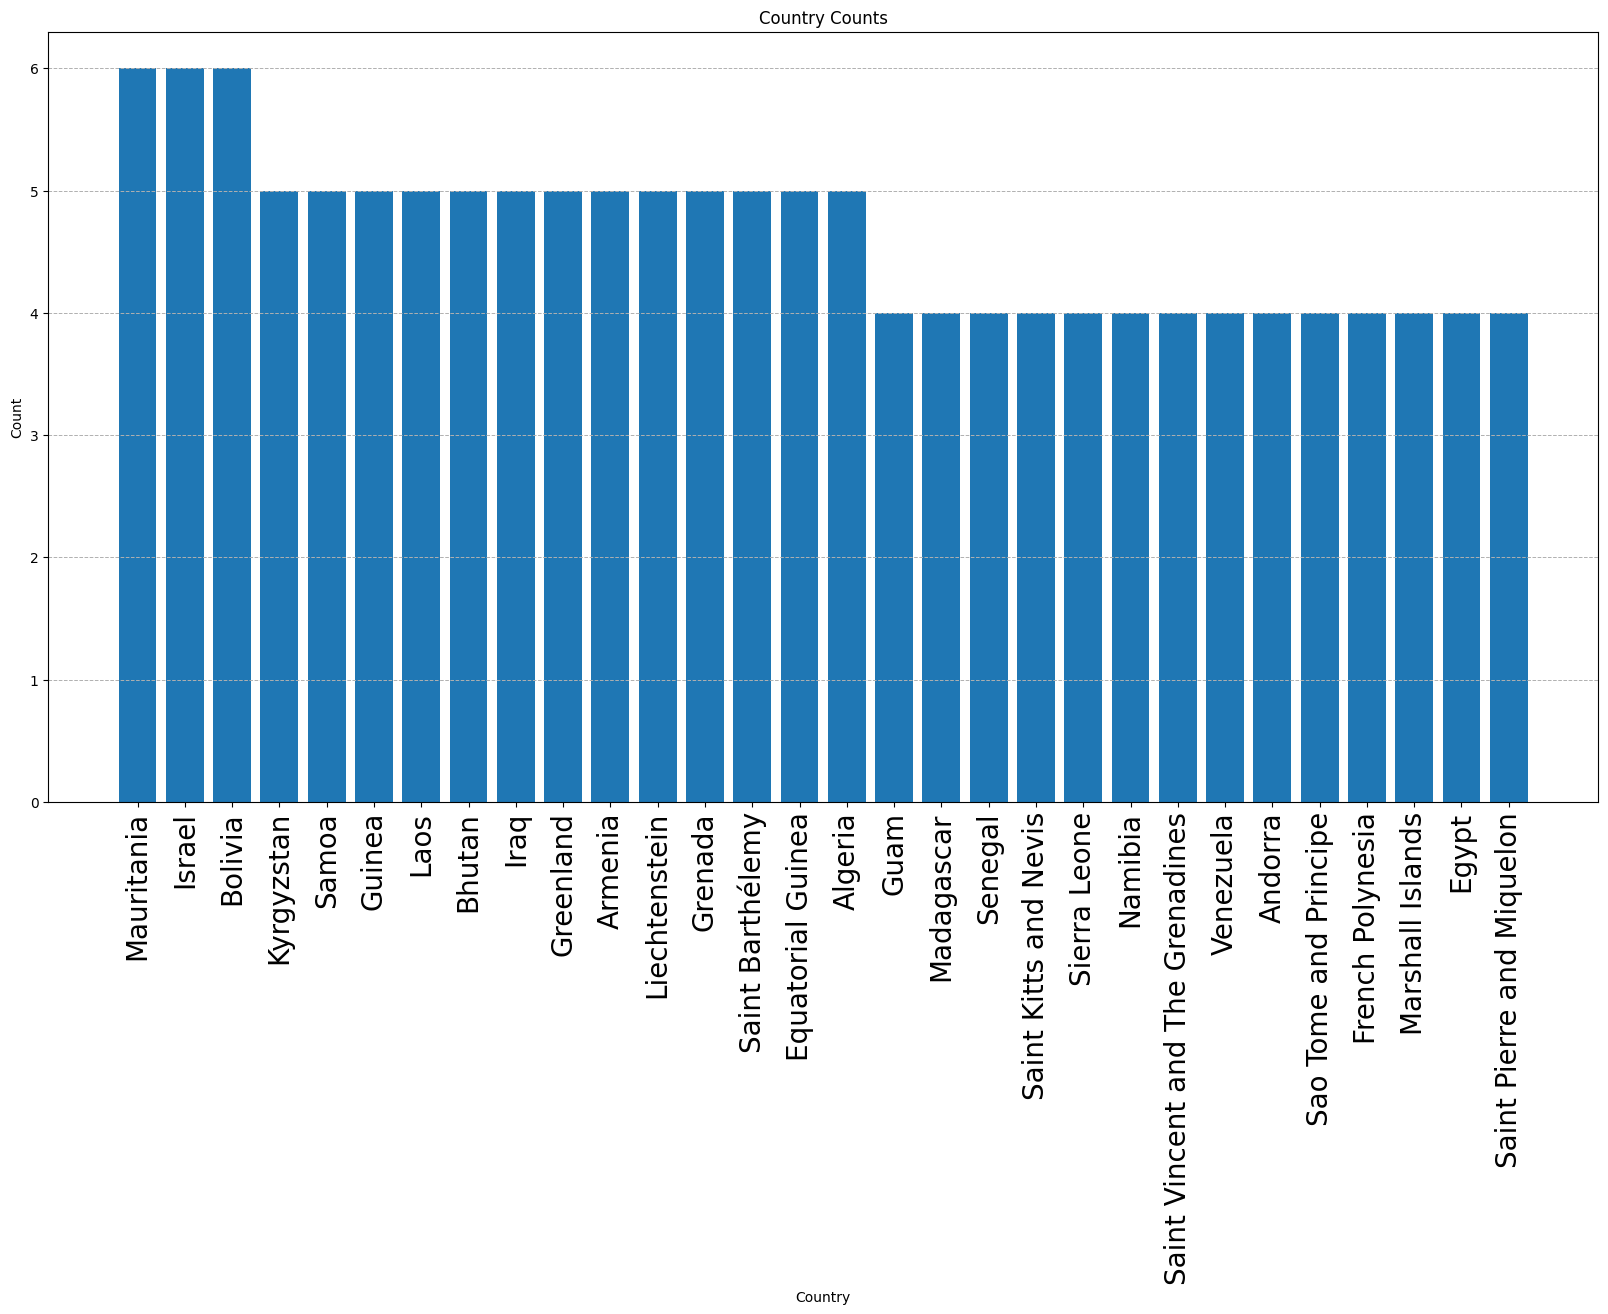

In [38]:
top_countries = df['country'].value_counts().head(30)

plt.figure(figsize=(20,10))
plt.xlabel('Country')
plt.xticks(fontsize=20)
plt.ylabel('Count')
plt.title('Country Counts')
plt.xticks(rotation=90)
plt.bar(top_countries.index, top_countries.values)
plt.grid(True, which='both', axis='y', linestyle='--', linewidth=0.7)
plt.show()

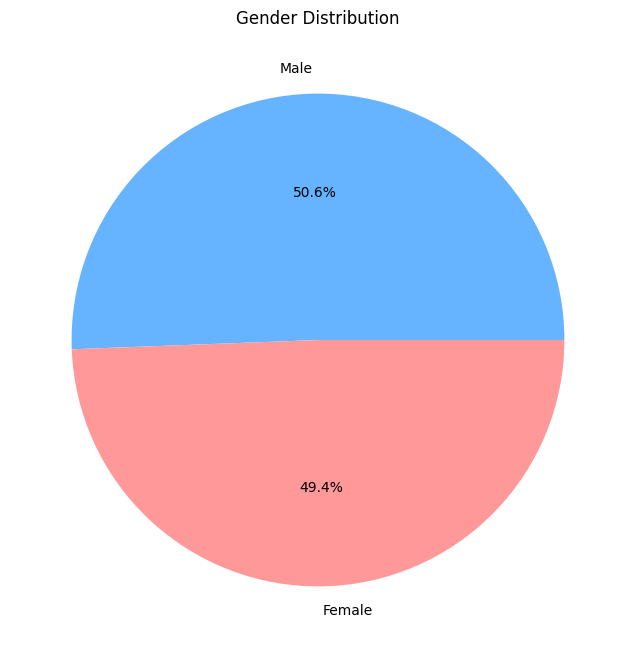

In [14]:
gender_counts = df['gender'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(gender_counts, labels = ['Male', 'Female'], autopct='%1.1f%%', colors=['#66b3ff','#ff9999'])
plt.title('Gender Distribution')
plt.show()

In [27]:
df.age.describe()

count    500.000000
mean      46.241674
std        7.978862
min       20.000000
25%       40.949969
50%       46.049901
75%       51.612263
max       70.000000
Name: age, dtype: float64

In [42]:
df[df['age']<30]

,customer name,customer e-mail,country,gender,age,annual Salary,credit card debt,net worth,car purchase amount
26,Ulric Lynn,sociis@vulputateveliteu.com,Colombia,0,28.009676,82842.53385,13102.158050,315775.3207,37161.55393
37,Uriel Bradshaw,ultrices@Integersemelit.com,Turkey,1,22.000387,43131.78411,10917.140940,326742.7352,10092.22509
275,Calvin A. Lancaster,ante.bibendum.ullamcorper@fringilla.net,South Africa,1,28.740244,69171.95281,6354.833826,613104.7840,38705.65839
298,Jelani A. Wall,aliquet@Duisa.co.uk,Brazil,0,27.440246,55369.72784,10888.934940,606851.1696,29670.83337
418,Josiah,Phasellus@Aliquamadipiscing.co.uk,Bolivia,1,29.599080,70076.22764,1726.809885,552267.6361,38174.87433
444,Camden,Aliquam.adipiscing.lobortis@loremut.net,Congo (Brazzaville),1,20.000000,70467.29492,100.000000,494606.6334,28645.39425
453,Tatyana,sem@parturientmontesnascetur.net,Norfolk Island,0,25.179893,45092.74073,11380.092880,158758.3577,9000.00000
481,Heather,erat.Etiam@elementum.org,Madagascar,1,29.034521,55433.61187,10769.750590,276466.6203,21471.11367


C:\Users\DELL 7510\AppData\Local\Temp\ipykernel_1944\1229404981.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  ax = sns.histplot(df['age'], bins=70, kde=True, palette='viridis',color='#EF5A6F')


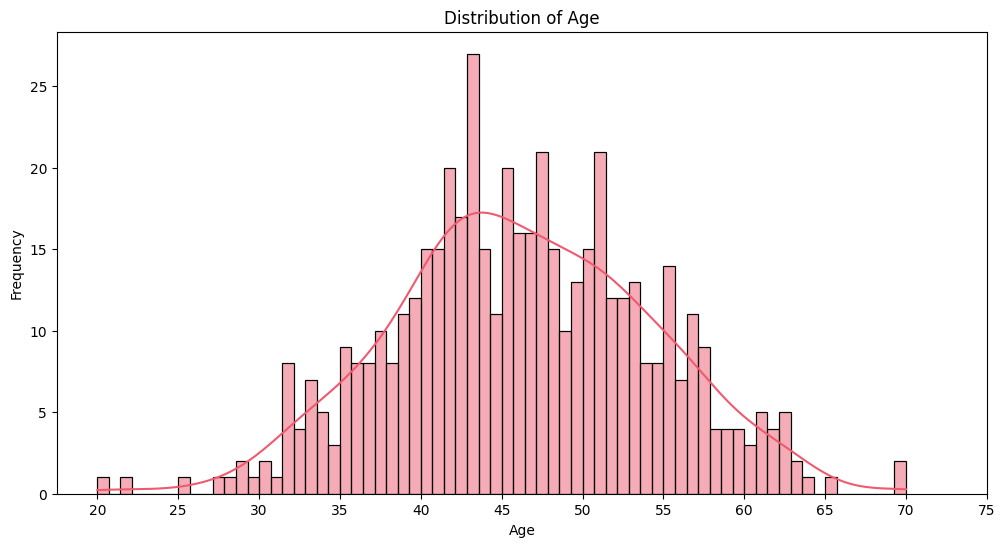

In [58]:
plt.figure(figsize=(12, 6))
ax = sns.histplot(df['age'], bins=70, kde=True, palette='viridis',color='#EF5A6F')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.xticks([i for i in range(20, 80, 5)])
plt.show()

In [17]:
df['annual Salary'].describe()

count       500.000000
mean      62127.239608
std       11703.378228
min       20000.000000
25%       54391.977195
50%       62915.497035
75%       70117.862005
max      100000.000000
Name: annual Salary, dtype: float64

C:\Users\DELL 7510\AppData\Local\Temp\ipykernel_1944\3101359420.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  ax = sns.histplot(df['annual Salary'], bins=70, kde=True, palette='viridis',color='#2E236C')


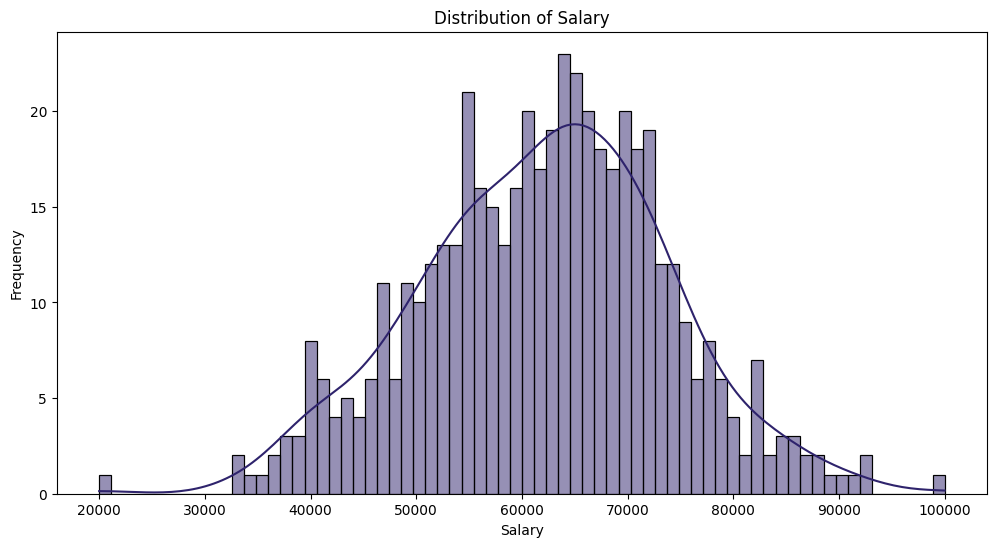

In [64]:
plt.figure(figsize=(12, 6))
ax = sns.histplot(df['annual Salary'], bins=70, kde=True, palette='viridis',color='#2E236C')
plt.title('Distribution of Salary')
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.show()

In [18]:
df['net worth'].describe()

count        500.000000
mean      431475.713625
std       173536.756340
min        20000.000000
25%       299824.195900
50%       426750.120650
75%       557324.478725
max      1000000.000000
Name: net worth, dtype: float64

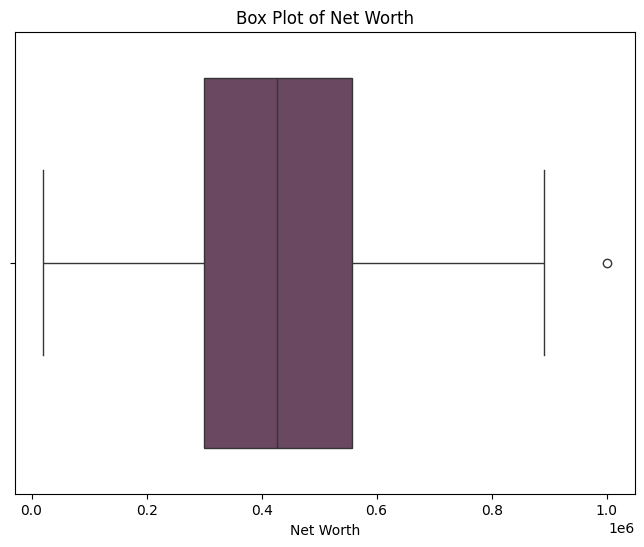

In [68]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['net worth'],color='#704264')
plt.title('Box Plot of Net Worth')
plt.xlabel('Net Worth')
plt.show()

In [19]:
df['car purchase amount'].describe()

count      500.000000
mean     44209.799218
std      10773.178744
min       9000.000000
25%      37629.896040
50%      43997.783390
75%      51254.709517
max      80000.000000
Name: car purchase amount, dtype: float64

C:\Users\DELL 7510\AppData\Local\Temp\ipykernel_1944\3237115597.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  ax = sns.histplot(df['car purchase amount'],edgecolor='black', bins=70, kde=True, palette='viridis',color='#A0153E')


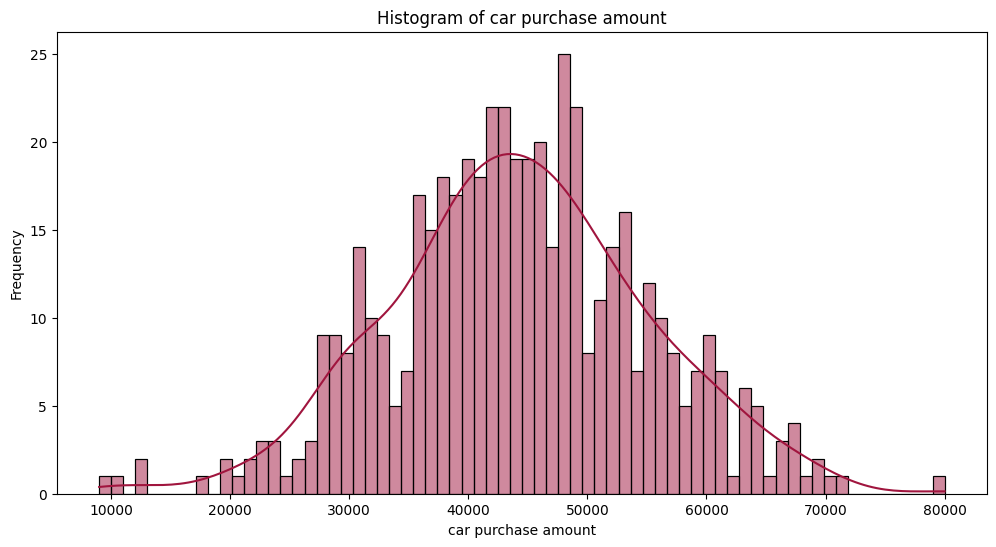

In [74]:
plt.figure(figsize=(12, 6))
ax = sns.histplot(df['car purchase amount'],edgecolor='black', bins=70, kde=True, palette='viridis',color='#A0153E')
plt.title('Histogram of car purchase amount')
plt.xlabel('car purchase amount')
plt.ylabel('Frequency')
plt.show()

In [20]:
correlation_matrix = df[[ 'age', 'annual Salary', 'credit card debt', 'net worth', 'car purchase amount']].corr()

print(correlation_matrix)


                          age  annual Salary  credit card debt  net worth  \
age                  1.000000       0.000130          0.034721   0.020356   
annual Salary        0.000130       1.000000          0.049599   0.014767   
credit card debt     0.034721       0.049599          1.000000  -0.049378   
net worth            0.020356       0.014767         -0.049378   1.000000   
car purchase amount  0.632865       0.617862          0.028882   0.488580   

                     car purchase amount  
age                             0.632865  
annual Salary                   0.617862  
credit card debt                0.028882  
net worth                       0.488580  
car purchase amount             1.000000  


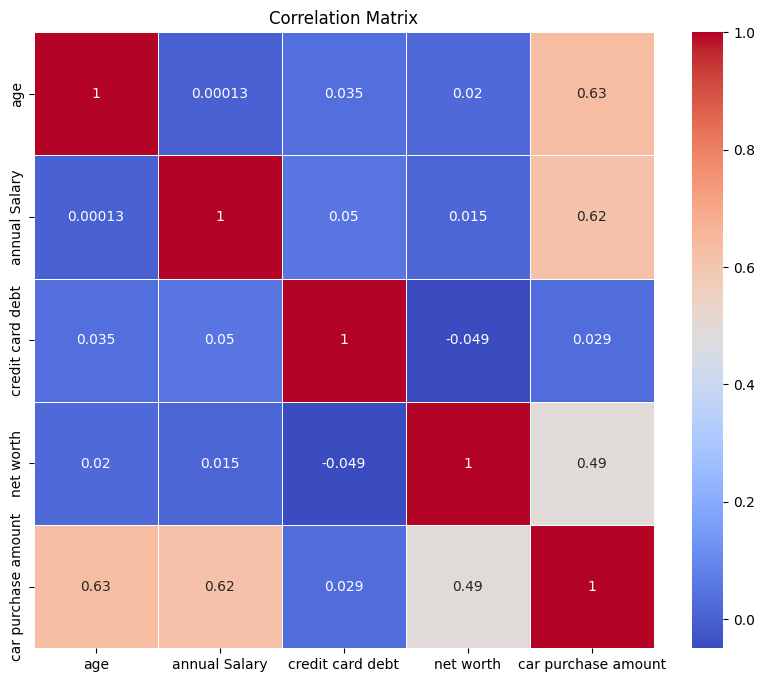

In [21]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [75]:
df.columns

Index(['customer name', 'customer e-mail', 'country', 'gender', 'age',
       'annual Salary', 'credit card debt', 'net worth',
       'car purchase amount'],
      dtype='object')

In [85]:
age_worth = df.groupby(['age'])['net worth'].describe()

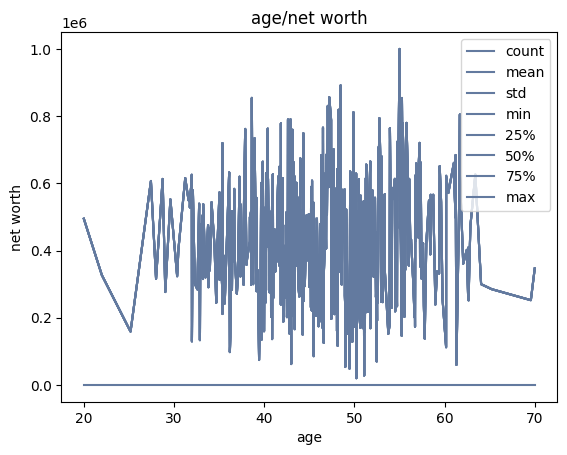

In [97]:
age_worth.plot(kind='line',color = '#637A9F')
plt.xlabel('age')
plt.ylabel('net worth')
plt.title('age/net worth')
plt.show()

<Axes: xlabel='age', ylabel='net worth'>

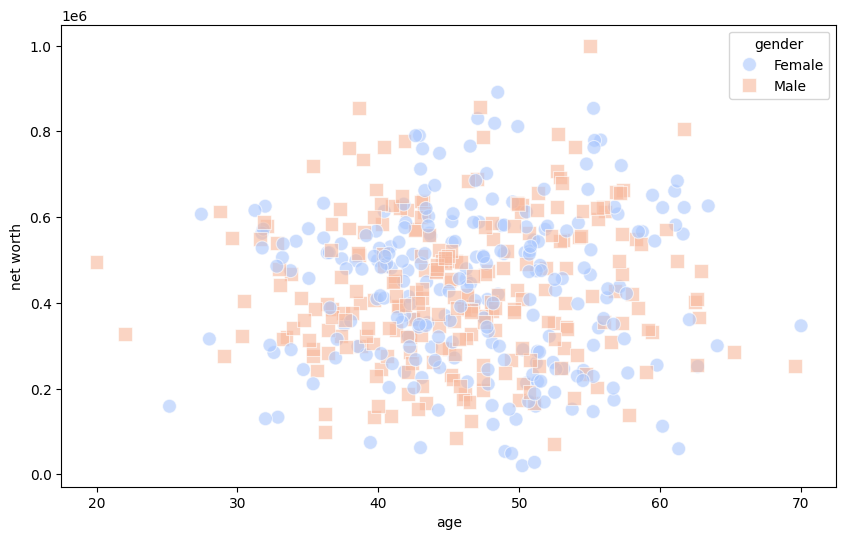

In [95]:
df['gender'] = df['gender'].map({1: 'Male', 0: 'Female'})
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df, 
    x="age", 
    y="net worth", 
    hue="gender", 
    palette="coolwarm",  # Use a coolwarm palette for better distinction
    style="gender",      # Use different markers for each gender
    markers=['o', 's'],  # Specific markers for gender (e.g., circle, square)
    s=100,               # Increase the size of the points
    alpha=0.6            # Add transparency to handle overlapping
)

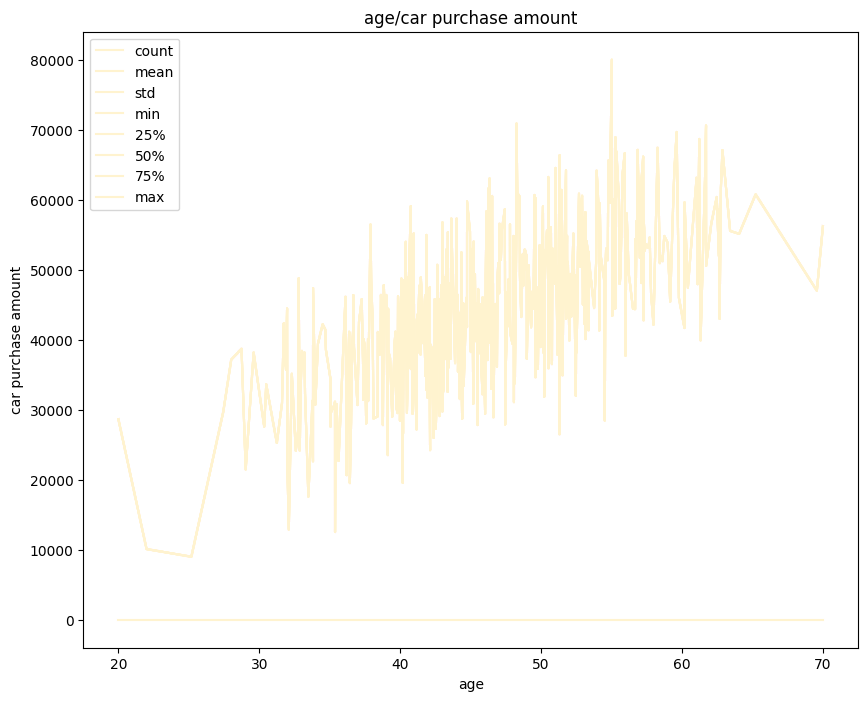

In [103]:
df.groupby(['age'])['car purchase amount'].describe().plot(kind='line',color = '#FFF3CF',figsize=(10,8))
plt.xlabel('age')
plt.ylabel('car purchase amount')
plt.title('age/car purchase amount')
plt.show()

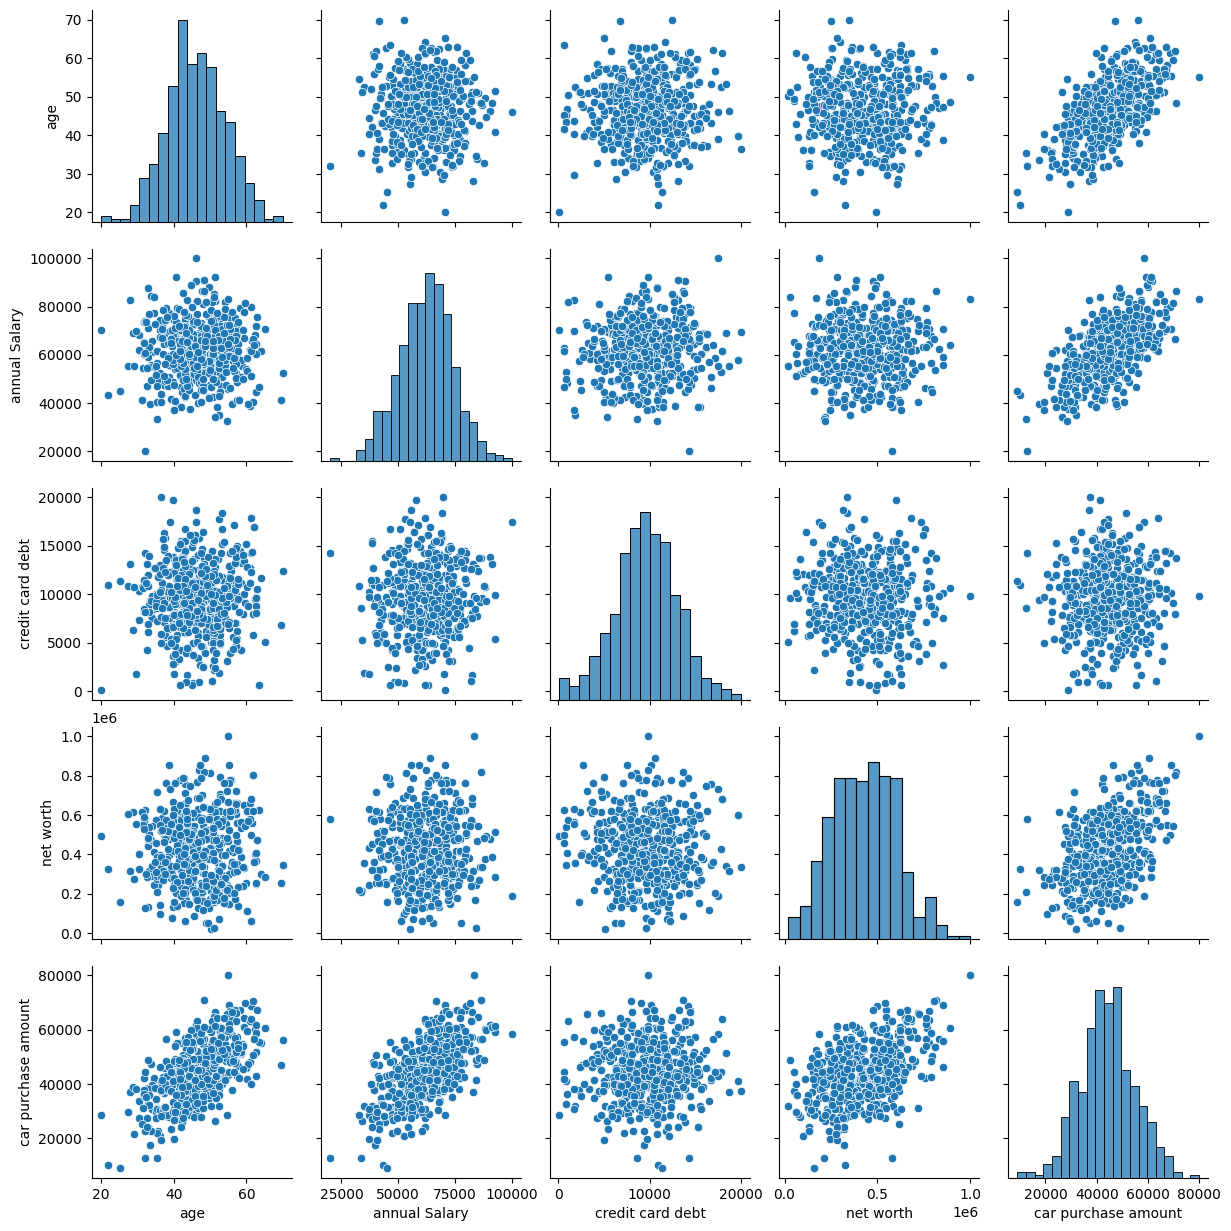

In [104]:
sns.pairplot(df)